In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as m
from matplotlib import pyplot as plt
import math

In [2]:
data= pd.read_csv('../sep19SexAndAgeAddedFINAL DATASET_ver2.txt',sep=',')
data=data.drop(columns=['B_DAY'])

In [3]:
data=data.query('FIELD_16 != 1 and FIELD_23 != 1')

data=data[data.SEX==0]
data=data[data.FIELD_15!=1]
data=data[data.FIELD_17!=1]
data=data[data.FIELD_22!=1]
data=data[data.FIELD_24!=1]
data=data[data.AGE<40]

In [4]:
# data.groupby(by=['FIELD_16','FIELD_23']).size().reset_index(name='freq')

In [6]:
data2=data[['L103000', 'L101700', 'L103100', 'L102900', 'L100800', 'S000300', 'S001200', 
                       'S000200', 'L100700', 'L101300', 'L190000', 'S000502', 'S000501', 'AGE', 'L100300', 'L190400', 
                       'L100100', 'L190800', 'L101000', 'L190300', 'L101600','SEX','FIELD_17','FIELD_22','FIELD_24',
'FIELD_33', 'FIELD_38', 'FIELD_31', 'FIELD_40', 'FIELD_41', 'FIELD_42', 'FIELD_29', 'FIELD_27', 'FIELD_28', 'FIELD_25', 
                       'FIELD_32',  'FIELD_21', 'FIELD_19', 'FIELD_26', 'FIELD_18', 'FIELD_14', 'FIELD_13', 
                       'FIELD_20', 'FIELD_15', 'FIELD_16']].dropna()

In [37]:
temppd=pd.DataFrame(x) #data2.copy()
temppd['y']=data2.L103000
temppd.head()
corval=abs(temppd.corr()).sort_values(by='y', ascending=False)


In [52]:
corval.y[:15].index

Index(['y', 'L101700', 'L103100', 'L102900', 'L100800', 'S000300', 'S001200',
       'S000200', 'L100700', 'L101300', 'L190000', 'S000502', 'S000501',
       'L100300', 'L100100'],
      dtype='object')

In [46]:
x=data2[['L101700', 'L103100', 'L102900', 'L100800', 'S000300', 'S001200',
       'S000200', 'L100700', 'L101300']]

y=data2[['L103000']]

In [28]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod

[  0.49206971  -2.95751906   0.72811891   1.60666403   0.9025088
  -0.61270553   0.118656     5.94142757  -0.08803748   3.93068828
   0.24642329   0.13223759  -0.03804127  20.31589214   0.42498386
   6.82290819   7.88666222 -15.39671617  -0.96943914  -0.18114056
   0.           0.           0.           0.           7.80757591
   4.4874006   -1.26246796  -0.02466989  -0.78879086  -0.50479377
   0.           0.          -0.           0.           0.02658205
   0.          -0.          -0.           0.2588781    0.
   0.           0.           0.           0.        ]
[-463.23604088]


,Name,coeff
0,L101700,0.492070
1,L103100,-2.957519
2,L102900,0.728119
3,L100800,1.606664
4,S000300,0.902509
5,S001200,-0.612706
6,S000200,0.118656
7,L100700,5.941428
8,L101300,-0.088037
9,L190000,3.930688


In [29]:
# # x.S000200=np.log2(x.S000200)
# xorg=x.copy()
# for i in x.columns:
#     x[i]=np.power(x[i],10)
    
# x=pd.concat([x,xorg])
# y=pd.concat([y,y])

In [30]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.StandardScaler()  #MinMaxScaler()
# x = min_max_scaler.fit_transform(x)

In [53]:
x=data2[['L101700', 'L103100', 'L102900', 'L100800', 'S000300', 'S001200',
       'S000200', 'L100700', 'L101300', 'L190000', 'S000502', 'S000501',
       'L100300', 'L100100']]
y=y=data2[['L103000']]

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y, random_state=42, test_size=0.2)

In [55]:
# x.dtypes

In [56]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=50)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[0.29924782 0.30110949 0.16904337 0.08560249 0.00220902 0.00128168
 0.00166389 0.00792721 0.00468883 0.00270062 0.00157012 0.0021543
 0.09602713 0.02477405]


mean_squared_error 5052.005867721494
root mean_squared_error 71.07746385262698
mean_absolute_error 44.60930953954557
r2_score 0.5041383653883915


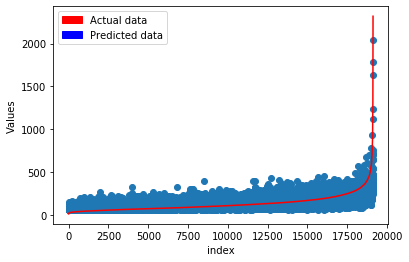

,t + 1,pred (t +1)
8521,1347.0,481.929510
1253,1425.0,447.311092
8979,1444.0,546.635886
8634,1449.0,644.463207
8568,1563.0,1632.287171
37,1569.0,649.669305
5889,1934.0,1116.062557
1809,2013.0,2043.825000
2204,2288.0,1238.981603
11975,2318.0,1787.127550


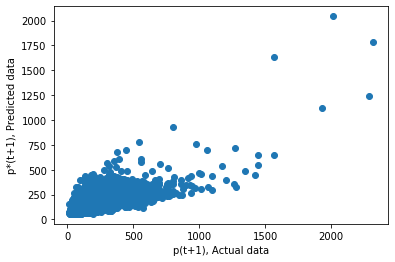

In [57]:

print('mean_squared_error',m.mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(m.mean_squared_error(ytest, ypred)))
print('mean_absolute_error',m.mean_absolute_error(ytest, ypred))
print('r2_score',m.r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [58]:
data.columns

Index(['Unnamed: 0', 'FIELD_1', 'FIELD_2', 'COMPARE', 'AGE', 'SEX', 'FIELD_3',
       'FIELD_4', 'FIELD_5', 'FIELD_6',
       ...
       'S004423', 'S004424', 'S005200', 'S007400', 'S008501', 'S008502',
       'S008503', 'S008504', 'S010101', 'S010102'],
      dtype='object', length=405)

In [ ]:
# for i in data2.columns:
#     plt.scatter(data2.L103000,data2[i])
#     plt.show()
# #     print(i)

In [ ]:
# plt.hist(data.L103100,bins=50)